In [6]:
from google.colab import files
files.upload()

Saving train.csv to train (1).csv


{'train (1).csv': b'PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked\r\n1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S\r\n2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C\r\n3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S\r\n4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S\r\n5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S\r\n6,0,3,"Moran, Mr. James",male,,0,0,330877,8.4583,,Q\r\n7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S\r\n8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,,S\r\n9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S\r\n10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C\r\n11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7,G6,S\r\n12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.55,C103,

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

In [8]:
data = pd.read_csv("train.csv")
print("Data loaded:", data.shape)
print(data.head(3))

Data loaded: (891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  


In [ ]:
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

# useless columns drop 
data = data.drop(['Cabin', 'Name', 'Ticket'], axis=1)

In [ ]:
enc = LabelEncoder()
data['Sex'] = enc.fit_transform(data['Sex'])
data['Embarked'] = enc.fit_transform(data['Embarked'])

# separating features and target
X = data.drop('Survived', axis=1)
y = data['Survived']

# splitting data to x y train
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train size: {Xtrain.shape}, Test size: {Xtest.shape}")

Train size: (712, 8), Test size: (179, 8)


In [ ]:
scaler = StandardScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)

# training all the models
models = {
    'LogReg': LogisticRegression(max_iter=500),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42)
}

results = {}


Training models...

LogReg -> accuracy: 0.8101
DecisionTree -> accuracy: 0.7654
RandomForest -> accuracy: 0.8268

Accuracy Comparison:
       Model  Accuracy
RandomForest    0.8268
      LogReg    0.8101
DecisionTree    0.7654


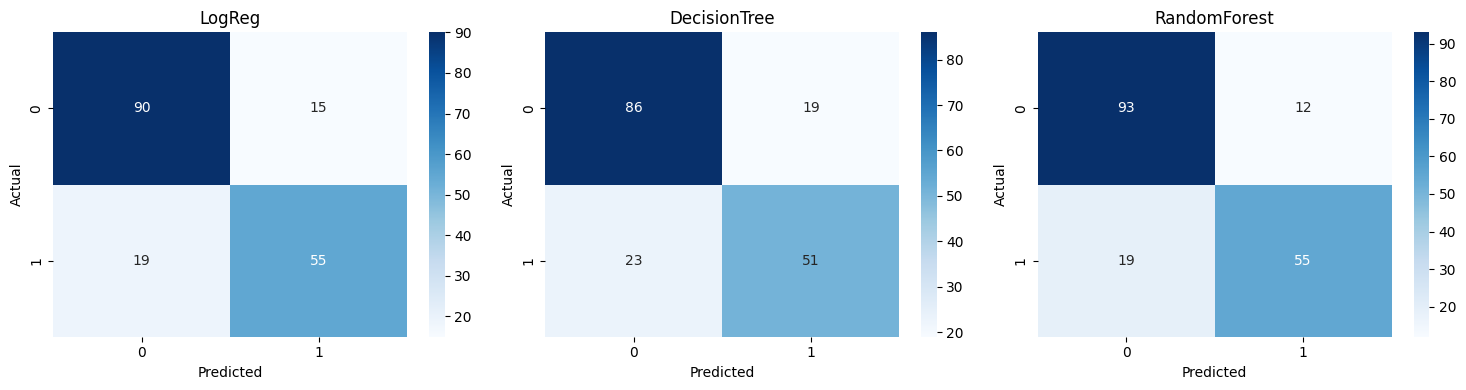

In [12]:
print("\nTraining models...\n")
for name, model in models.items():
    model.fit(Xtrain_scaled, ytrain)
    preds = model.predict(Xtest_scaled)
    acc = accuracy_score(ytest, preds)
    cm = confusion_matrix(ytest, preds)
    results[name] = {'acc': acc, 'cm': cm}
    print(f"{name} -> accuracy: {acc:.4f}")

# accuracy table
acc_df = pd.DataFrame([(n, round(v['acc'], 4)) for n, v in results.items()],
                      columns=['Model', 'Accuracy']).sort_values(by='Accuracy', ascending=False)

print("\nAccuracy Comparison:")
print(acc_df.to_string(index=False))

# showing all confusion matrices together
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for ax, (name, metrics) in zip(axes, results.items()):
    sns.heatmap(metrics['cm'], annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(name)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
plt.tight_layout()
plt.show()

In [ ]:
#Best result
best_model = acc_df.iloc[0]
print(f"\nBest model overall: {best_model['Model']} ({best_model['Accuracy']:.4f})")



Best model overall: RandomForest (0.8268)
